# Planning a Vacation
We both recently took a vacation to Edinburgh. Since there's so much to do in Edinburgh we wanted a way of visualising the places we wanted to visit so that it would be easier to plan the trip. Here's how we did it!

# Import Packages

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
 
import folium
from folium.plugins import MarkerCluster

# Add Places to the List

Define the central coordinates for Edinburgh. This is going to be useful when plotting the map but also gives a good reference point for when inputting the latitude and longitude of the destinations.

In [ ]:
EDI_COORDINATES = (55.953251, -3.188267)

In [ ]:
places_path = '\gdrive\My Drive\Colab Notebooks\'

In [ ]:
places_df = pd.DataFrame(columns = ['type', 'Name', 'lat', 'long', 'desc'])

Below you can change the variables using the form. For longitude and latitude you can use a website (https://www.freemaptools.com/convert-uk-postcode-to-lat-lng.html ). Once you've changed them. Run the code to add the place.

In [ ]:
#@title Add Place

typ     = "insta"   #@param ['coffee', 'alc', 'food', 'attr', 'sites', 'insta', 'misc'] {allow-input: true}
name    = "Dean Village"       #@param {type:"string"}

lat     = 55.95261  #@param {type:"number"}     
long    = -3.21905  #@param {type:"number"}

## Give a description like opening times or something noteable.
desc    = "A beautiful village with old buildings"       #@param {type:"string"}

## Add these to the original dataframe
places_df = places_df.append({'type'  : typ,
                              'Name'  : name,
                              'lat'   : lat,
                              'long'  : long,
                              'desc'  : desc}, ignore_index= True)

places_df

,type,Name,lat,long,desc
0,insta,Dean Village,55.95261,-3.21905,A beautiful village with old buildings


Now save your newly updated dataframe of places.

In [ ]:
places_df.to_csv(places_path + 'edinburgh.csv', index = False)
print('Saved!')

Saved!


# Plot Places on Map

First we have to load our new dataframe containing all our places.

In [ ]:
places_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/edinburgh.csv', index_col = 0)
places_df.head()

,type,Name,lat,long,desc
0,Insta,Dean Village,55.95261,-3.21905,Old buildings
1,Insta,Ross Fountain,55.94900,-3.20500,Old Fountain in Princes Street Gardens
2,Insta,Royal Botanic Gardens,55.96611,-3.21361,A bunch of nice botanical gardens
3,Insta,Circus Lane,55.95786,-3.20344,A picturesque Street with mews houses
4,Insta,Lovers Touch (Vennel Steps),55.94569,-3.19692,A great view of the castel with a long set of ...


Our plan is to plot point markers on a map of Edinburgh to see the locations of the places. We are going to colour code them and change the marker icon to make it easier to distinguish between them. The different icons can be found at https://github.com/lvoogdt/Leaflet.awesome-markers but some of these markers don't work because the map that we're going to use from the package 'folium' only uses icons from before version 5 (so version 4 or earlier which can be found here https://fontawesome.com/v4.7/icons/ ). 

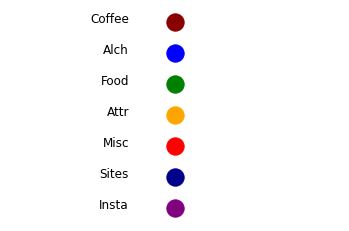

In [ ]:
colours = ['purple', 'darkblue', 'red', 'orange', 'green', 'blue', 'darkred']                 ## Define the colours
icons = ['instagram', 'map', 'question', 'university', 'cutlery', 'glass', 'coffee']          ## Define the icons.
types = places_df['type'].unique()                                                               ## This creates a list of all the different types of places (insta, food, coffee, etc.)
 
fig, ax = plt.subplots()                                             ## We are going to plot the differnt types of places with their respective colours so we have a legend.
for i in range(len(types)):                                          ## So for each type of place, plot a marker with the respective colour and text to the right of it.
  plt.scatter(2,i, c = colours[i], s = 300)
  plt.annotate(types[i], (1.97, i), ha = 'right', fontsize = 12)
 
plt.ylim((-0.5, 6.5))                                                ## This line just adds some white space above and below our markers so that they are clearer to see. 
plt.axis('off')                                                      ## Since this isn't a graph we don't care about the axis so we remove them
plt.show()

The following cell adds each location to the map in the form of a marker with a specific colour and icon.

In [ ]:
map = folium.Map(location=EDI_COORDINATES, zoom_start= 14)                             ## First we need to create the map using the central edinburgh coordinates with a set zoom.

for i, p_type in enumerate(types):                                                    ## We loop throught the different place types, retreiving their index in the list.
  temp_df  = places_df[places_df['type'] == p_type]                                   ## This creates a temporary dataframe, only containing the locations that are labelled as 'insta', food', etc.
  loc_list = temp_df[['lat', 'long']].values.tolist()                                 ## Convert the longitude and latitude into a list of lists.
  for j in range(len(temp_df)):                                                       ## Going though each location, add a marker to the map. 
    folium.Marker(loc_list[j], popup = temp_df['Name'].iloc[j], 
                  icon = folium.Icon(color = colours[i], icon_color = 'white', icon = icons[i], prefix = 'fa')).add_to(map)       ## Here we can change the icon colour, marker type, marker colour, etc.
                                                                                                                                  ## prefix = 'fa' is required for the icons. It stands for Font Awesome (the place we get the icons).
                                                                                                                                  ## This is because you can get icons from somewhere else.
 
folium.Marker([55.96073, -3.18203], popup = 'Home', icon = folium.Icon(color = 'white', icon_color = 'black', icon='home', prefix = 'fa')).add_to(map)      ## Add a data point for the hotel.

Let's view our map.

In [ ]:
display(map)

That's it! 

From here we were able to plan routes and see what were close to when we were out. This could go on much further by integrating a code to automatically convert the post code to (long, lat) and calculating distances between places etc. but for our trip this worked perfectly as you can open Google Colab on your phone (if you have an android, I haven't tried IOS but from a quick search it seems it should work as well). It would even be improved by adding columns for opens and closes.

In [ ]:
def get_info( dataframe , name ):
  return dataframe[dataframe['Name'] == name]

pd.set_option("display.max_columns")

In [ ]:

get_info(places_df, 'Dean Village')